# Debugging

* Debugging is the **process of finding errors** in a program
* very important part of programming
* can take considerible time
* mastering debugging techniques can save you a lot of time

## Literature

* **Python docs on errors and exceptions**
    * http://docs.python.org/3/tutorial/errors.html

## Overview

1. **Introduction/ Motivation**
2. **Debugging in with IPython `%debug`**
8. Introduction to Spyder
3. Debugging with break-points
3. Exercise

## Introduction / Motivation

No program is perfect and no written document will be free of all possible errors the first time it is written.

There are three types of errors in a program:

1. Syntax errors
2. Runtime errors
3. Logical errors

### Syntax errors

Errors that the interpreter (or compiler in other languages) can spot, because the syntax of the program is violated. In Python these errors are typically indentation errors, or forgotten colons.

These errors will be reported as soon as the faulty line of code is imported by python. Because these errors are reported immediately, **no debugging is necessary to fix them**.

**The error message is useful for debugging.** It shows the line on which the error occurred, and it even has a guess at where in the line – notice the `^` symbol pointing at the place in the line.

In [1]:
0as = 5

SyntaxError: invalid syntax (<ipython-input-1-97e31abad4cb>, line 1)

In [2]:
def brokenFunction():
     a = 1
        return a

IndentationError: unexpected indent (<ipython-input-2-d9cf7ffaa5f2>, line 3)

In [3]:
def brokenFunction()
    a = 1

SyntaxError: invalid syntax (<ipython-input-3-d172bed7389c>, line 1)

**Keeping lines of code short can help to track down syntax errors.**

Both the following examples contain a similar error. The second example has split a long line of code into separate lines, making it much easier to debug.

In [4]:
import math

# This function contains one very long line – hard to find the error!
def gauss(datapoint, mean, std_deviation):
    """Compute likelihood of data point under a Gaussian"""
    
    return (1 / (std_deviation * math.sqrt(2 * math.pi) ) * math.exp( -((datapoint - mean)**2) / 2 * std_deviation**2)

SyntaxError: unexpected EOF while parsing (<ipython-input-4-3d21dc1d3122>, line 7)

In [5]:
# This function splits the line into separate variables – easier to read and debug!
def gauss(datapoint, mean, std_deviation):
    """Compute likelihood of data point under a Gaussian"""
    
    A = 1 / (std_deviation * math.sqrt(2 * math.pi))
    B = datapoint - mean)**2
    C = 2 * std_deviation**2
    
    return A * math.exp(-B / C)

SyntaxError: invalid syntax (<ipython-input-5-08f0ae35104b>, line 6)

Be aware that sometimes the actual error will have occurred before the line it is reported. This is usually due to how Python handles brackets.

In [5]:
a = (3 + 4 * 1
b = 5 + 6

SyntaxError: invalid syntax (<ipython-input-5-2daa09ff2875>, line 2)

### Runtime errors

These are errors that violate the program during runtime. Typically these are operations which are not allowed with a datatype, access errors or numerical errors. 

Because the interpreter cannot know before running the program how the data what data each variable holds, it can only reports the error once it happened at runtime.

As an example, take this function which seems perfectly fine:

In [6]:
def addStuff(a,b):
    return a + b

It can be called properly with numbers or even with strings

In [7]:
addStuff(4,5)

9

In [8]:
addStuff("a", "b")

'ab'

But if wrong datatypes are mixed, a `TypeError` is thrown.

In [9]:
addStuff(3, "a")

TypeError: unsupported operand type(s) for +: 'int' and 'str'

Similarly,

In [10]:
def throwsIndexError():
    lst = []
    lst[2]
    
def throwsKeyError():
    d = dict()
    d['does not exist']
    
def throwsZeroDivisionError():
    1/0

In [11]:
throwsIndexError()

IndexError: list index out of range

In [12]:
throwsKeyError()

KeyError: 'does not exist'

In [13]:
throwsZeroDivisionError()

ZeroDivisionError: division by zero

**These errors are fairly common**, even experienced programmers spend much time on fixing such bugs. The problem with these errors is that **might appear only in very specific cases** which are hard to reproduce or are hard to test. However, at least these errors are reported by the program and one can go and fix them.

There are times when correcting these errors is easy just by looking at the code. Often, however, it is helpful to have a look what values the variables hold at the moment the error is thrown. For this end, one can use the `%debug` magic in iPython and the iPython qtconsole. Debugging with break points is also common, particularly in compiled languages. Another way to deal with this to print out values of variables at various places. This will be covered by the first three sections of this lecture.

### Logical Errors

These are the real nasty ones. **A logical error is an error that does not violate any rule imposed by the programming language**, but is an implementation that does not solve the task. In other words, the interpreter cannot tell you that something is wrong, you do not get any error message, just your result is wrong.

As an example let yourself reminded on the *Pythagorean theorem*:

$a^2 = b^2 + c^2$

If your task is to find a $b$, given $a$ and $c$, you might have a bad day and "solve" it like this:

In [14]:
import numpy as np
def getB(a,c):
    b = np.sqrt(a ** 2) - np.sqrt(c ** 2)
    return b

This function does not have a `SyntaxError`, nor will it throw a `RuntimeError` if you put numbers in.

In [15]:
a = 5
c = 3
getB(a, c)

2.0

Above I used the most simple combination of $a$, $b$, and $c$ in $a^2 = b^2 + c^2$, which is:

$5^2 = 4^2 + 3^2$

$25 = 16 + 9$

Therefore the answer should have been 3.

As you saw, **logic errors are silent bugs that screw up your experiments**. The example above was trivial, but the more complex a program becomes, the more likely it is, that you use somewhere some function wrong or misstype a sign or similar things.

Such errors can only be found by tests. This is **one reason why the use of functions is generally highly recommended**, because functions give you the opportunity to do sanity checks on small parts of the code.

A way how people deal with this is covered in the last section, *tests*, of this lecture.

## Debugging with IPython `%debug` magic

This command is one of the many reasons why it makes sense to use the IPython terminal over the standard python one. It used to work in plain IPython or the IPython qtconsole only, but in very recent IPython versions one can use it straight in the IPython notebook.

The `%debug` magic makes it possible to exploit the fact that python is an interpreted language. It reopens the program at the very moment it crashed and gives full access to all variables and functions. **It can be used to:**

**inspect variables and manipulate them**

* this makes it much easier to find the reason an error was thrown.

**call functions**

* you can see if the function would have thrown an error also with different values

**walk along the stack trace**

* i.e. follow the function calls that led the program to be in the state it was in when it failed

### Example

Lets define some functions to work with.

In [17]:
def changeValue(lst, idx, value):
    """
    Change value of a list at a given index to value
    """
    lst[idx] = value
    
    
def setDiagonal(lst, value=-1):
    """
    Set all diagonal elements in the nested list to 
    the given value, e.g.
    
    [[0,0,0,0],       [[1,0,0,0],
     [0,0,0,0],  -->   [0,1,0,0],
     [0,0,0,0],        [0,0,1,0],
     [0,0,0,0]]        [0,0,0,1]]
    """
    for i in range(len(lst)):
        changeValue(lst[i], i, value)
        
    
def generateList(depth=10):
    """
    Generate a trianglar nested list, e.g.
    
    generateList(4):
        [[0, 1, 2],
         [0, 1],
         [0],
         []]
    """
    lst = []
    for i in range(depth):
        innerLst = []
        for k in range(i):
            innerLst += [k]
        
        lst.insert(0, innerLst)
        
    return lst

    
def boom():
    """
    Nomen est omen
    """
    lst = generateList(10)
    setDiagonal(lst, -1)
    
    

Lets see if the functions do what they are supposed to do.

In [19]:
print(generateList(4))

[[0, 1, 2], [0, 1], [0], []]


In [20]:
testLst = []
for i in range(4):
    row = []
    for k in range(4):
        row += [0]
        
    testLst += [row]

In [20]:
testLst

NameError: name 'testLst' is not defined

In [22]:
setDiagonal(testLst)

In [21]:
testLst

NameError: name 'testLst' is not defined

Each of the functions seem to work! Not a very good example for a lecture on debugging... But we still have the prophetically called function `boom` left. Maybe we have more luck with this one, lets try.

In [22]:
boom()

IndexError: list assignment index out of range

What you see above is a beautiful example of a **stacktrace**. You can see how from **top to bottom** functions were called, and also the **lines** where these function calls happened. So you **get an idea *where* ** in your program things went wrong. However, it is still **difficult to see *what* might have gone wrong**. 

Enter `%debug`.

`%debug` is an **interactive debugger**, similar to the standard pdb (python-de-bugger). It is **controlled by single letter commands** and also it **can execute any normal python statement**.

The the most important single letter commands are (there are more):

* u(p) -- up the stacktrace
* d(own) -- down the stacktrace
* w(where) -- print stacktrace
* p(rint) -- print variable
* q(uit) -- exits the debugger

Ok lets have a go. Observe how I can **walk up and down through the function calls** using **u** and **d** (I am using now the fully spelled out commands, but later only the single letter version):

In [ ]:
%debug

> <ipython-input-17-6e7b2a3a5533>(5)changeValue()
      3     Change value of a list at a given index to value
      4     """
----> 5     lst[idx] = value
      6 
      7 



ipdb>  
ipdb>  
ipdb>  
ipdb>  
ipdb>  
ipdb>  
ipdb>  
ipdb>  
ipdb>  
ipdb>  
ipdb>  12


12


You can see that you can change the position of the debugger. It will stop you if you are at the highest point, or back at the lowest. But that does not give you much more information than you got from the error message above, which showed you the stacktrace already.

So, lets go and investigate what went wrong. The first hint is always the error message itself:

`IndexError: list assignment index out of range`

This is pretty self-explanatory. We tried to access the list somewhere where it is not defined, as we did in the example for `RuntimeErrors` above. But why did that happen? We always looped in the range of the lists. (Have a look in the code above if you see that our loops are dynamic, and should not exceed any list lengths).

Maybe you spotted the problem already, because the comments are very visual and we tried the functions out individually. I did this in this case to make sure you understand the code. Normally comments are either very sparse, or not telling you anything about how the data is manipulated. Which means, its difficult just by looking at it what went wrong.

Ok, let use the `%debug` magic to find out what went wrong, hands-on. For demonstration purposes, I will put a comment after each command, like this:

`ipdb> print(idx); "my comment about that line"`

Would exectute `print idx`, while you can read the string afterwards to understand why I do things.

In [ ]:
%debug

So above you see how **inspecting values of variables can help you hunt down the problem**. This is particularly true, the more complex the program is and the more libraries you start to use. Because at some point you might forget how lists where nested, which dimension held which values, etc.

But this is pretty standard. Every programming language has similar inspection tools. However, because python is not compiled, **you can execute any python command while you are debugging and actively manipulate the values while the program is on hold**. Or you can just **visually inspect** your data, or **you can save your data (!)** and look at it outside of the debugger.

To give you an idea, lets just create a matrix and pretend something in an arcane function went wrong:

In [ ]:
%matplotlib inline

In [31]:
from matplotlib import pyplot as plt

In [28]:
def arcaneFunction():
    mat = np.random.rand(10,10)
    mat += 2
    1/0    
    return mat

In [29]:
arcaneFunction()

ZeroDivisionError: division by zero

Ok something went wrong, lets do two things:

1. visualize the matrix
2. save it out to at least save your progress (hours of computing) or to see which part in the randomly generated matrix led to the error

> <ipython-input-28-435d8761338f>(4)arcaneFunction()
      1 def arcaneFunction():
      2     mat = np.random.rand(10,10)
      3     mat += 2
----> 4     1/0
      5     return mat

ipdb> plt.imshow(mat)
ipdb> plt.show()


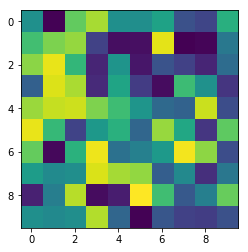

ipdb> np.save("randomMatrix.npy", mat)
ipdb> q


In [32]:
%debug

Pretty impressive! 

Just to make sure that we saved out the right thing:

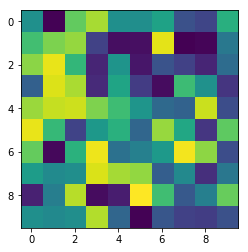

In [33]:
plt.imshow(np.load("randomMatrix.npy"))

## Exercise
Yippie!